# IMPORTS:

In [1]:
from scipy.io import loadmat
import random
import numpy as np
import math 
import sklearn.decomposition
import sklearn.discriminant_analysis
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
import numpy as np
from scipy.linalg import eigh
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score
import random
from sklearn.naive_bayes import GaussianNB
from sklearn.manifold import Isomap
import numpy as np
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.manifold import TSNE

# PIXEL DISPLAY:

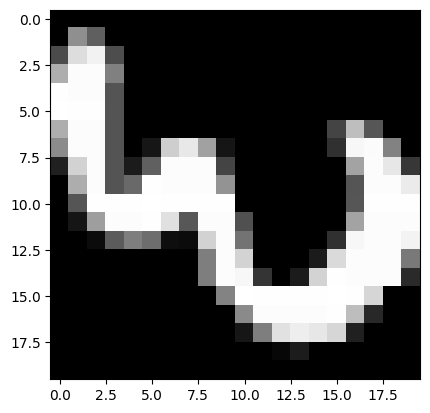

<Figure size 640x480 with 0 Axes>

In [2]:
digits = np.loadtxt("digits.txt")
labels = np.loadtxt("labels.txt")

df = np.column_stack((digits, labels))

# Select digit to display
i = 1
I = digits[i-5, :]

# Reshape digit into 20x20 image and display
plt.imshow(np.reshape(I, (20,20)), cmap='gray')
plt.axis('image')
plt.show()
plt.savefig('exampletoshowdigit.png')

# Question 1:
In this question, you will use principal components analysis (PCA) to project the 400-dimensional data onto lower dimensional subspaces to observe the effect of dimensionality on the performance of the Gaussian classifier.

**1)**  First, center the data by subtracting the mean of the whole data from each sample.

In [3]:
# Calculate the mean of the whole data (both training and testing sets)
whole_data = digits
whole_data_mean = np.mean(whole_data, axis=0)

# Center the training and testing data by subtracting the mean
digits = digits - whole_data_mean

In [4]:
# DIVISION OF DATA
random_state = 42
# Split the range of indices
digits1, digits2 = train_test_split(digits, test_size=0.5, random_state=random_state)
labels1, labels2 = train_test_split(labels, test_size=0.5, random_state=random_state)

**2)**  Then, use PCA to obtain a new set of bases (use the training data set, i.e., 2,500 samples for PCA). Plot the eigenvalues in descending order. How many components (subspace dimension) would you choose by just looking at this plot?

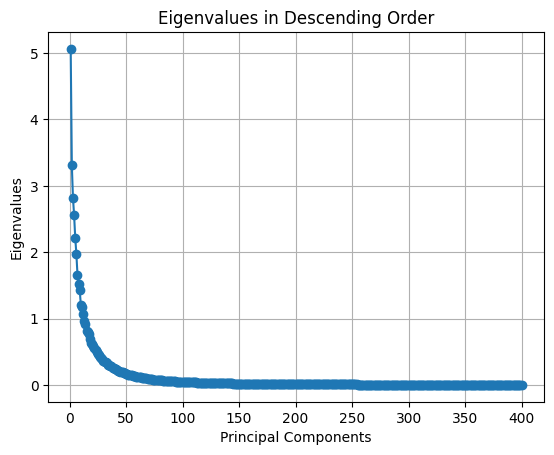

<Figure size 640x480 with 0 Axes>

In [5]:
#NEW PCA CODE WILL COME.
pca = PCA()
pca.fit(digits1)

plt.plot(np.arange(1, len(pca.explained_variance_) + 1), np.sort(pca.explained_variance_)[::-1], marker='o')
plt.xlabel('Principal Components')
plt.ylabel('Eigenvalues')
plt.title('Eigenvalues in Descending Order')
plt.grid()
plt.show()
plt.savefig('eigen_pca.png')

**3 )**  Display the sample mean for the whole training data set as an image (using samples for all classes together, but before centering in Step 1). Also display the bases (eigenvectors) that you chose as images (e.g., like in Figure 1) and discuss the results with respect to your expectations.

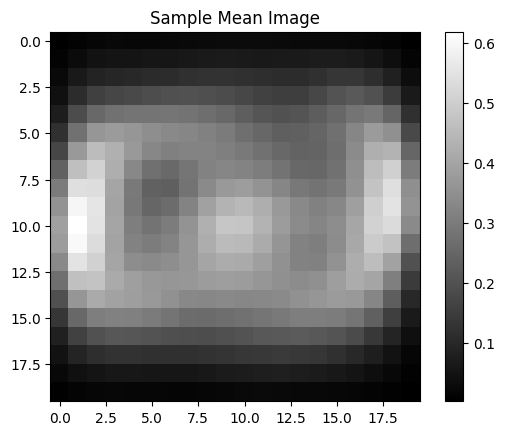

<Figure size 640x480 with 0 Axes>

In [6]:
digitss = np.loadtxt("digits.txt")
labelss = np.loadtxt("labels.txt")

digits11, digits22 = train_test_split(digitss, test_size=0.5, random_state=random_state)
labels11, labels22 = train_test_split(labelss, test_size=0.5, random_state=random_state)

X, y = digits11, labels11
X_reshaped = X.reshape(-1, 20, 20)
sample_mean = np.mean(X_reshaped, axis=0)
plt.imshow(sample_mean, cmap='gray')
plt.title("Sample Mean Image")
plt.colorbar()
plt.show()
plt.savefig('pca_mean.png')


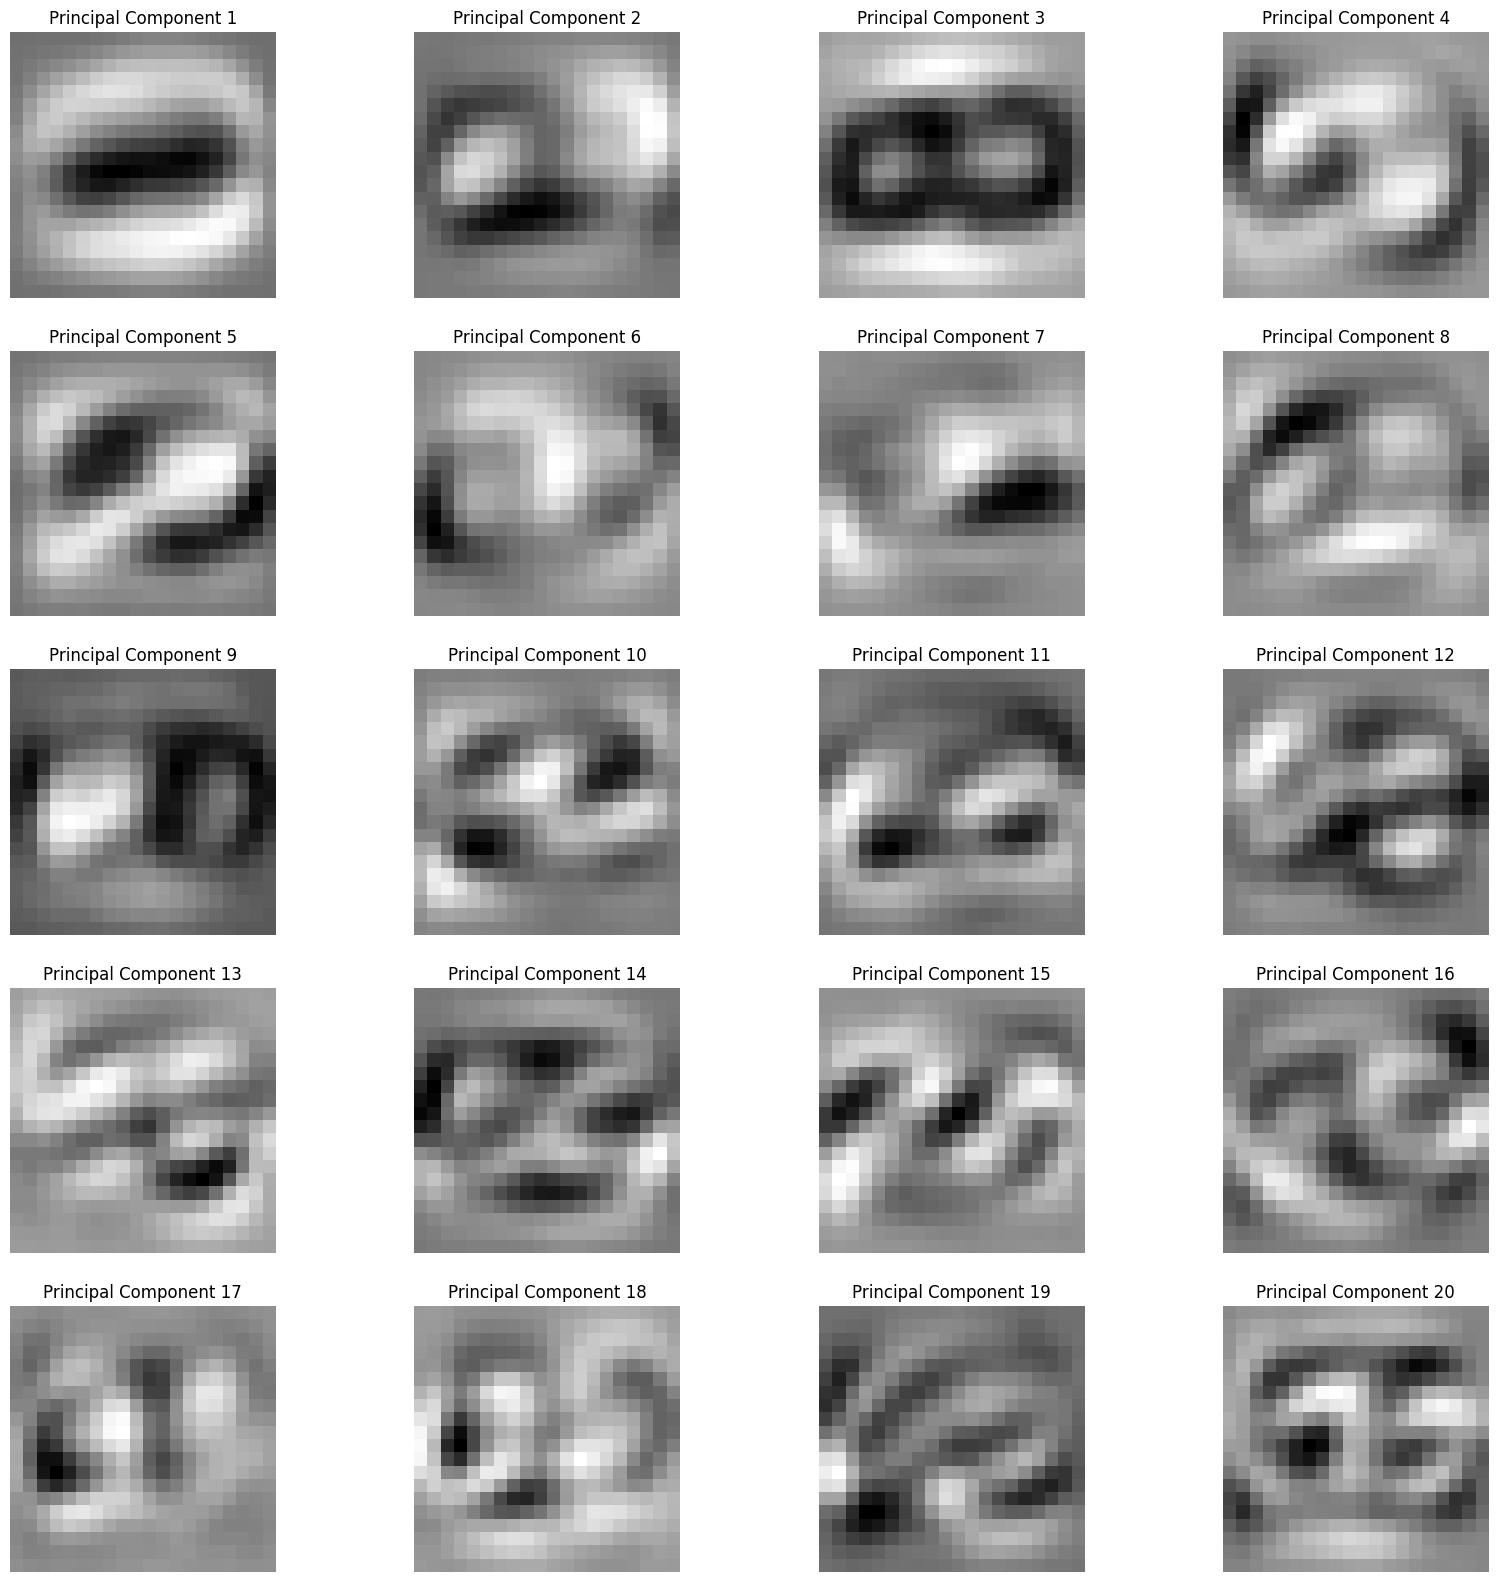

<Figure size 640x480 with 0 Axes>

In [7]:
pca = PCA(n_components=119)
pca.fit(digits11)

fig, axes = plt.subplots(5,4,figsize=(20, 20))
for i, ax in enumerate(axes.flat):
    component_image = pca.components_[i].reshape(20, 20)
    ax.imshow(component_image, cmap='gray')
    ax.set_title(f"Principal Component {i+1}")
    ax.axis('off')
plt.show()
plt.savefig('20plot_pca.png')

**4 )** Choose different subspaces with dimensions between 1 and 200 (choose at least 20 different subspace dimensions, the more the better), and project the data (project both the training data and the test data using the transformation matrix estimated from the training data) onto these subspaces. Train a Gaussian classifier using data in each subspace (do not forget to use half of the data for training and the remaining half for testing).

In [8]:
class QuadraticGaussianClassifier:
    def __init__(self, n_classes=10):
        self.n_classes = n_classes
        self.means = []
        self.covariances = []

    def fit(self, X, y):
        for label in range(self.n_classes):
            class_data = X[y == label]
            class_mean = np.mean(class_data, axis=0)
            class_cov = np.cov(class_data.T)
            self.means.append(class_mean)
            self.covariances.append(class_cov)

    def predict(self, X):
        predictions = []
        for x in X:
            class_probabilities = []
            for i in range(self.n_classes):
                diff = x - self.means[i]
                exponent = -0.5 * diff.T @ np.linalg.inv(self.covariances[i]) @ diff
                probability = np.exp(exponent) / (np.sqrt((2 * np.pi) ** len(x) * np.linalg.det(self.covariances[i])))
                class_probabilities.append(probability)
            predicted_label = np.argmax(class_probabilities)
            predictions.append(predicted_label)
        return np.array(predictions)

In [9]:
train_errors = []
test_errors = []

subspace_dims = [5, 10, 15, 20, 30, 40, 50, 60, 70, 80, 90, 100, 120, 140, 160, 180, 190, 195, 198, 199]

def project_data(subspace_dim, X_train, X_test):
    pca = PCA(n_components=subspace_dim)
    X_train_projected = pca.fit_transform(X_train)
    X_test_projected = pca.transform(X_test)
    return X_train_projected, X_test_projected

for dim in subspace_dims:
    X_train_projected, X_test_projected = project_data(dim, digits1, digits2)
    clf = QuadraticDiscriminantAnalysis()
    clf.fit(X_train_projected, labels1)
    y_train_pred = clf.predict(X_train_projected)
    train_error = 1 - accuracy_score(labels1, y_train_pred)
    train_errors.append(train_error)
    
    y_pred = clf.predict(X_test_projected)
    test_error = 1 - accuracy_score(labels2, y_pred)
    test_errors.append(test_error)
    print(f"Subspace Dimension: {dim}, Train Error: {train_error:.4f}, Test Error: {test_error:.4f}")

Subspace Dimension: 5, Train Error: 0.3324, Test Error: 0.3584
Subspace Dimension: 10, Train Error: 0.1268, Test Error: 0.1428
Subspace Dimension: 15, Train Error: 0.0792, Test Error: 0.1012
Subspace Dimension: 20, Train Error: 0.0532, Test Error: 0.0764
Subspace Dimension: 30, Train Error: 0.0328, Test Error: 0.0672
Subspace Dimension: 40, Train Error: 0.0232, Test Error: 0.0672
Subspace Dimension: 50, Train Error: 0.0152, Test Error: 0.0748
Subspace Dimension: 60, Train Error: 0.0108, Test Error: 0.0788
Subspace Dimension: 70, Train Error: 0.0060, Test Error: 0.0860
Subspace Dimension: 80, Train Error: 0.0032, Test Error: 0.0928
Subspace Dimension: 90, Train Error: 0.0024, Test Error: 0.0980
Subspace Dimension: 100, Train Error: 0.0020, Test Error: 0.1052
Subspace Dimension: 120, Train Error: 0.0004, Test Error: 0.1200
Subspace Dimension: 140, Train Error: 0.0000, Test Error: 0.1456
Subspace Dimension: 160, Train Error: 0.0000, Test Error: 0.1832
Subspace Dimension: 180, Train Error:

**5)** Plot classification error vs. the number of components used for each subspace, and discuss your results. Compute the classification error for both the training set and the test set (training is always done using the training set), and provide two plots.

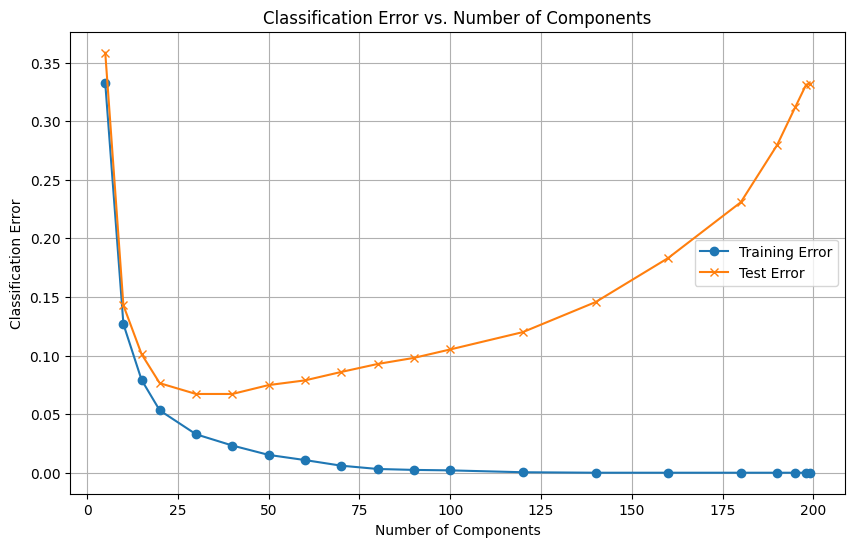

<Figure size 640x480 with 0 Axes>

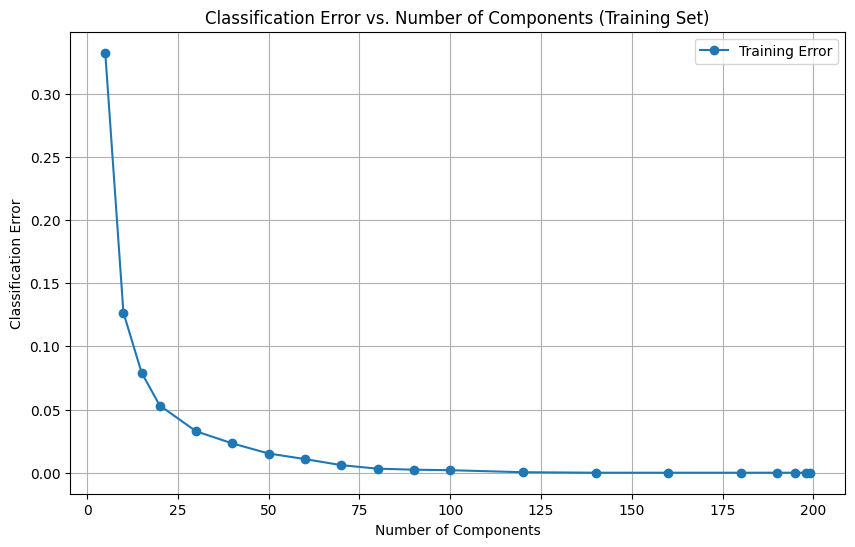

<Figure size 640x480 with 0 Axes>

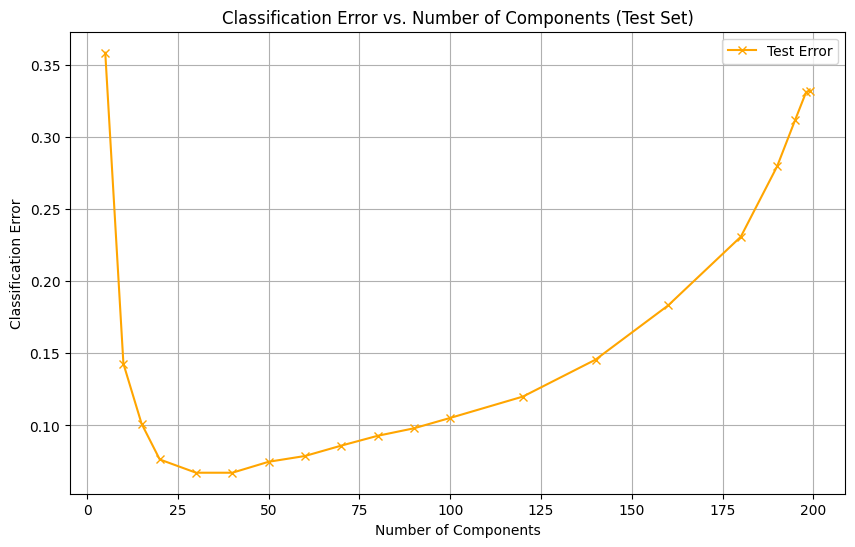

<Figure size 640x480 with 0 Axes>

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(subspace_dims, train_errors, marker='o', label='Training Error')
plt.plot(subspace_dims, test_errors, marker='x', label='Test Error')
plt.xlabel('Number of Components')
plt.ylabel('Classification Error')
plt.title('Classification Error vs. Number of Components')
plt.legend()
plt.grid()
plt.show()
plt.savefig('pca_gen.png')

plt.figure(figsize=(10, 6))
plt.plot(subspace_dims, train_errors, marker='o', label='Training Error')
plt.xlabel('Number of Components')
plt.ylabel('Classification Error')
plt.title('Classification Error vs. Number of Components (Training Set)')
plt.legend()
plt.grid()
plt.show()
plt.savefig('pca_train.png')

plt.figure(figsize=(10, 6))
plt.plot(subspace_dims, test_errors, marker='x', label='Test Error', color='orange')
plt.xlabel('Number of Components')
plt.ylabel('Classification Error')
plt.title('Classification Error vs. Number of Components (Test Set)')
plt.legend()
plt.grid()
plt.show()
plt.savefig('pca_test.png')

# Question 2:
In this question, you will use Isomap (J. B. Tenenbaum, V. de Silva, J. C. Langford, “A Global Geometric Framework for Nonlinear Dimensionality Reduction,” Science, vol. 290, pp:2319- 2323, 2000) to map the 400-dimensional data onto lower dimensional manifolds.

**1)** Use Isomap to obtain low-dimensional embeddings of the digits data. Note that you need to use the full data set, i.e., 5,000 patterns, but you may still have several patterns that were not embedded. This is a common observation in many techniques that are based on neighborhood graphs where the embedding implementation only uses the largest connected component of the neighborhood graph and ignores the patterns belonging to other components.

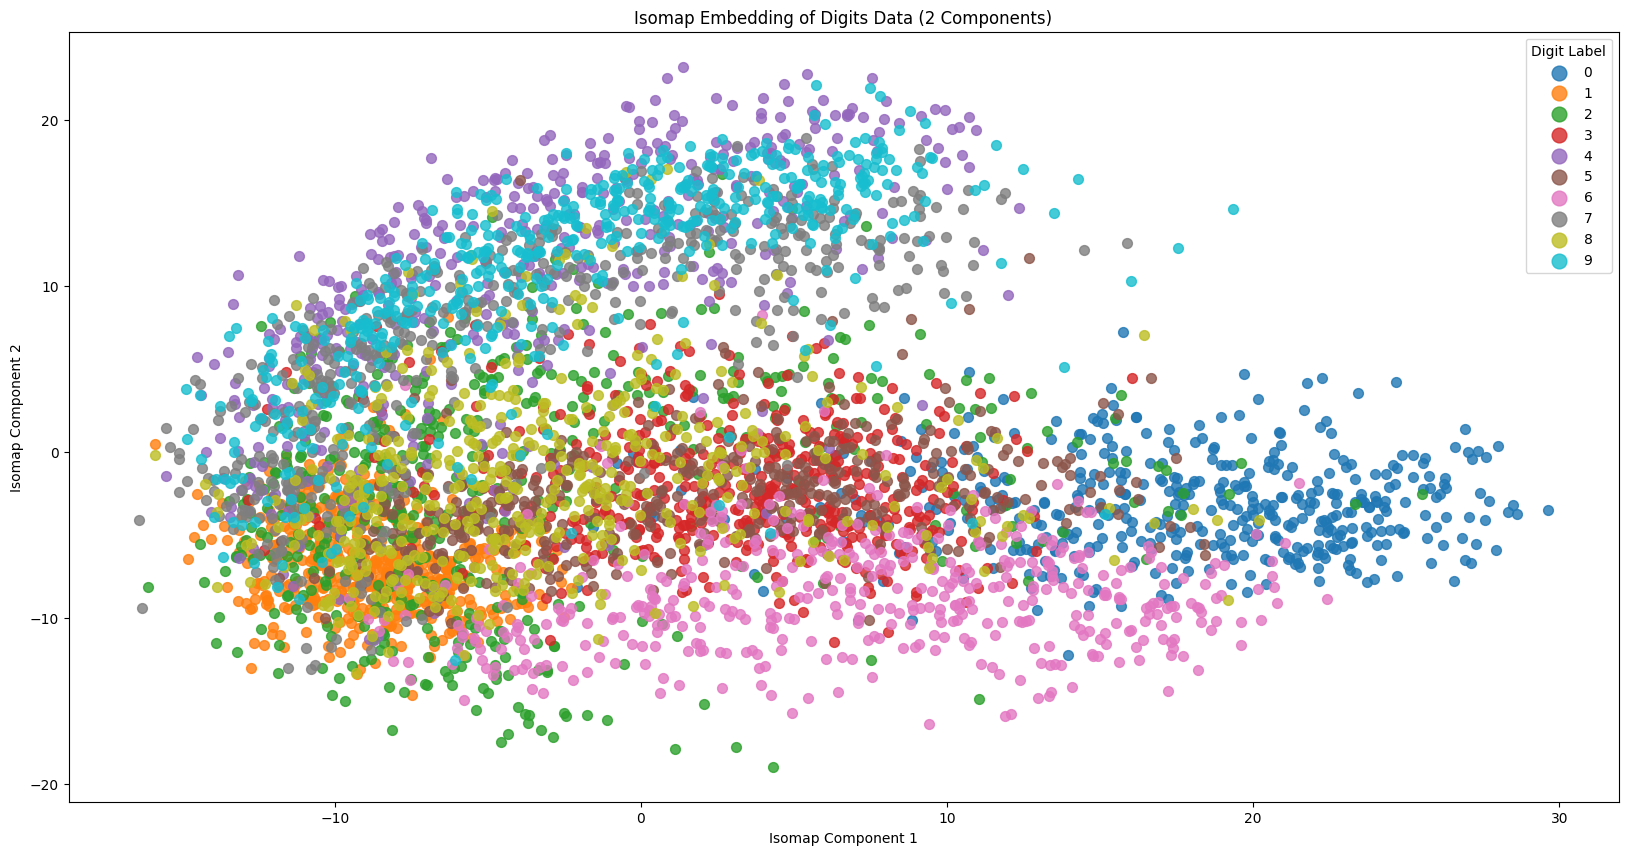

<Figure size 640x480 with 0 Axes>

In [11]:
n_components = 2
isomap = Isomap(n_components=n_components,n_neighbors=10)

digits_transformed = isomap.fit_transform(digitss)

colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 
          'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']

fig, ax = plt.subplots(figsize=(20, 10))
for i in range(10):
    indices = np.where(labels == i)[0]
    ax.scatter(digits_transformed[indices, 0], digits_transformed[indices, 1], 
               c=colors[i], label=str(i), s=50, alpha=0.8)
ax.set_xlabel('Isomap Component 1')
ax.set_ylabel('Isomap Component 2')
ax.set_title(f'Isomap Embedding of Digits Data ({n_components} Components)')
ax.legend(title='Digit Label', fontsize='medium', markerscale=1.5)
plt.show()
plt.savefig('2d_iso.png')

**2)** Choose dimensions between 1 and 200 (choose at least 20 different dimensions, the more the better) and train a Gaussian classifier for each dimensionality (do not forget to use half of the data for training and the remaining half for testing).

In [12]:
def project_data(subspace_dim, X_train, X_test):
    isomap = Isomap(n_components=subspace_dim)
    X_train_projected = isomap.fit_transform(X_train)
    X_test_projected = isomap.transform(X_test)
    return X_train_projected, X_test_projected

train_errors = []
test_errors = []
subspace_dims = [5, 10, 15, 20, 30, 40, 50, 60, 70, 80, 90, 100, 120, 140, 160, 180, 190, 195, 198, 199]

for dim in subspace_dims:
    X_train_projected, X_test_projected = project_data(dim, digits1, digits2)
    clf = QuadraticDiscriminantAnalysis()
    clf.fit(X_train_projected, labels1)

    y_train_pred = clf.predict(X_train_projected)
    train_error = 1 - accuracy_score(labels1, y_train_pred)
    train_errors.append(train_error)

    y_pred = clf.predict(X_test_projected)
    test_error = 1 - accuracy_score(labels2, y_pred)
    test_errors.append(test_error)

    print(f"Subspace Dimension: {dim}, Train Error: {train_error:.4f}, Test Error: {test_error:.4f}")

Subspace Dimension: 5, Train Error: 0.2440, Test Error: 0.2608
Subspace Dimension: 10, Train Error: 0.1544, Test Error: 0.1848
Subspace Dimension: 15, Train Error: 0.1268, Test Error: 0.1772
Subspace Dimension: 20, Train Error: 0.1072, Test Error: 0.1636
Subspace Dimension: 30, Train Error: 0.0796, Test Error: 0.1488
Subspace Dimension: 40, Train Error: 0.0644, Test Error: 0.1488
Subspace Dimension: 50, Train Error: 0.0512, Test Error: 0.1508
Subspace Dimension: 60, Train Error: 0.0400, Test Error: 0.1516
Subspace Dimension: 70, Train Error: 0.0308, Test Error: 0.1512
Subspace Dimension: 80, Train Error: 0.0240, Test Error: 0.1556
Subspace Dimension: 90, Train Error: 0.0152, Test Error: 0.1604
Subspace Dimension: 100, Train Error: 0.0120, Test Error: 0.1672
Subspace Dimension: 120, Train Error: 0.0076, Test Error: 0.1772
Subspace Dimension: 140, Train Error: 0.0044, Test Error: 0.1848
Subspace Dimension: 160, Train Error: 0.0028, Test Error: 0.1988
Subspace Dimension: 180, Train Error:

**3)** Plot classification error vs. dimension, and discuss your results. Compute the classification error for both the training set and the test set (training is always done using the training set), and provide two plots. The discussion should include the setting (particular choice for the parameters) for Isomap, the effect of dimensionality on the classification error, and comparison of the Isomap results with the PCA results. 

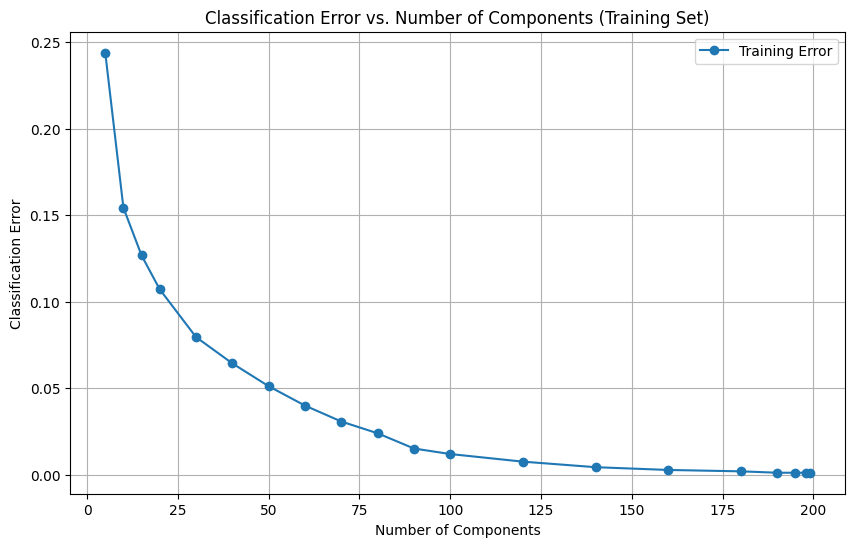

<Figure size 640x480 with 0 Axes>

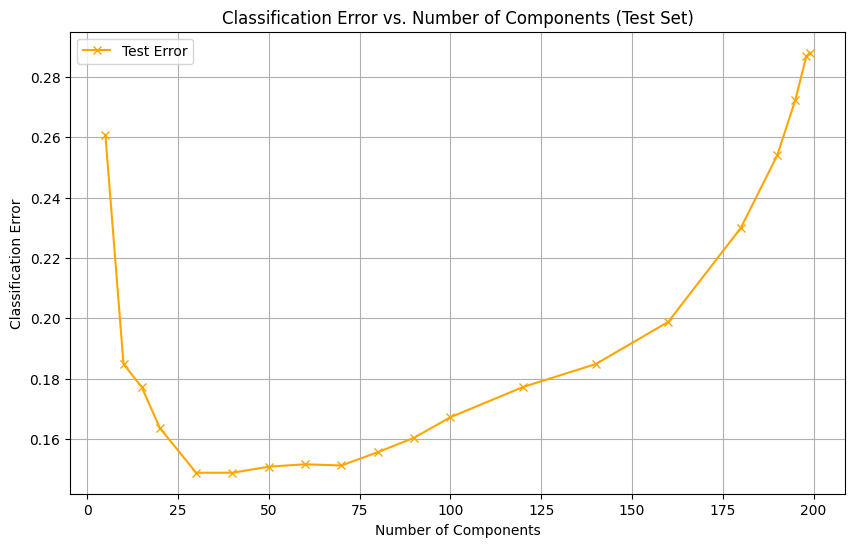

<Figure size 640x480 with 0 Axes>

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(subspace_dims, train_errors, marker='o', label='Training Error')
plt.xlabel('Number of Components')
plt.ylabel('Classification Error')
plt.title('Classification Error vs. Number of Components (Training Set)')
plt.legend()
plt.grid()
plt.show()
plt.savefig('iso_train.png')

plt.figure(figsize=(10, 6))
plt.plot(subspace_dims, test_errors, marker='x', label='Test Error', color='orange')
plt.xlabel('Number of Components')
plt.ylabel('Classification Error')
plt.title('Classification Error vs. Number of Components (Test Set)')
plt.legend()
plt.grid()
plt.show()
plt.savefig('iso_test.png')

# Question 3:
In this question, you will use dimensionality reduction particularly designed for visualization of high-dimensional data sets. In particular, you are asked to use t-SNE (L. J. P. van der Maaten and G. E. Hinton, “Visualizing High-Dimensional Data Using t-SNE,” Journal of Machine Learning Research, vol. 9, pp:2579-2605, November 2008) for mapping the digit data set to two dimensions. Compute the resulting mapping for the whole data set, and present the scatter of the samples together with their class information. Discuss the setup that you used (e.g., parameters needed for initialization, iterations, or stopping, etc), and comment on the resulting visualizations.

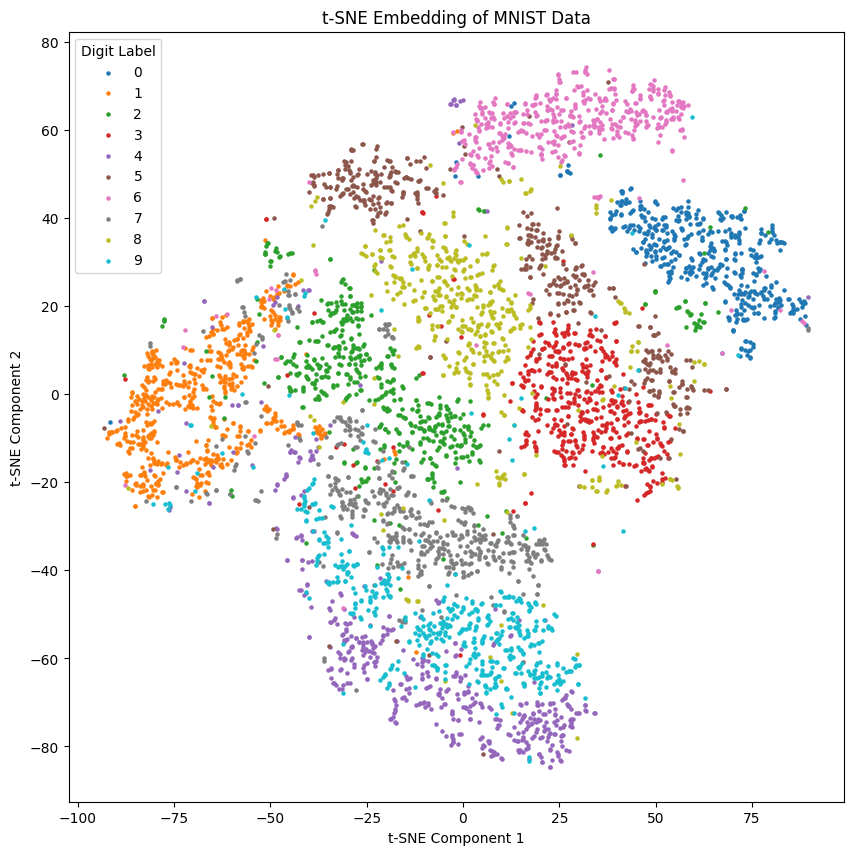

<Figure size 640x480 with 0 Axes>

In [14]:
from sklearn.datasets import fetch_openml
from sklearn.manifold import TSNE

y = labelss
tsne = TSNE(n_components=2,n_iter=1000, random_state=42, perplexity=25,learning_rate=200)
X_tsne = tsne.fit_transform(digitss)

colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple',
          'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']

fig, ax = plt.subplots(figsize=(10, 10))
for i in range(10):
    ax.scatter(X_tsne[y == i, 0], X_tsne[y == i, 1], c=colors[i], label=str(i), s=5)
ax.legend(title='Digit Label')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Embedding of MNIST Data')
plt.show()
plt.savefig('tsne.png')

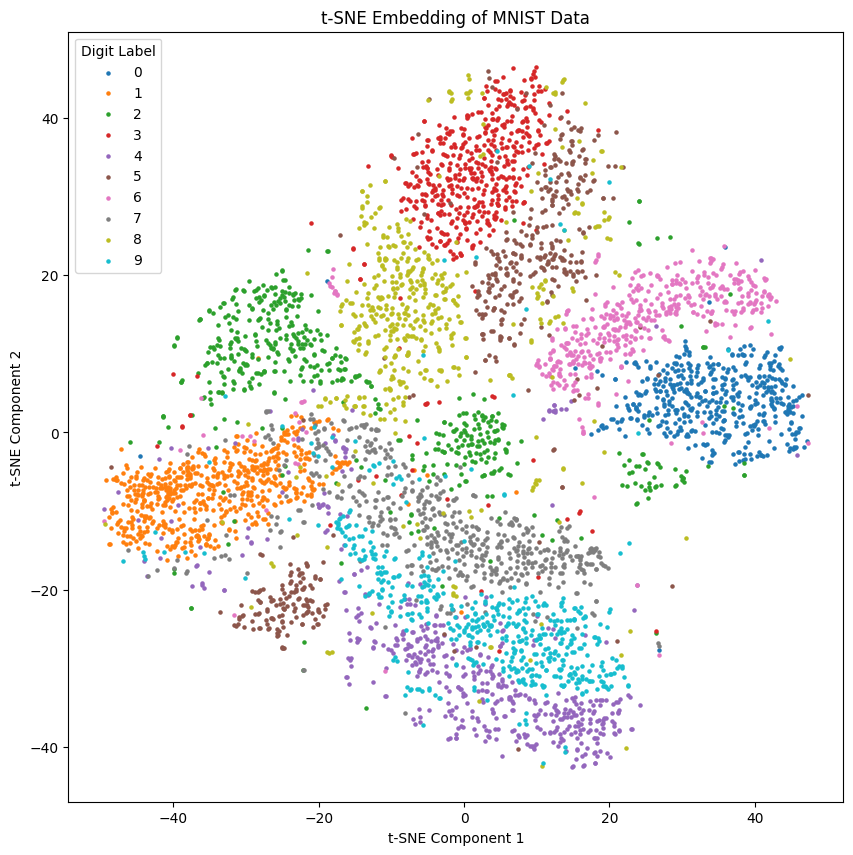

In [15]:
from sklearn.datasets import fetch_openml
from sklearn.manifold import TSNE

y = labelss
tsne = TSNE(n_components=2,n_iter=1000, random_state=42, perplexity=100,learning_rate=200)
X_tsne = tsne.fit_transform(digitss)

colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple',
          'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']

fig, ax = plt.subplots(figsize=(10, 10))
for i in range(10):
    ax.scatter(X_tsne[y == i, 0], X_tsne[y == i, 1], c=colors[i], label=str(i), s=5)
ax.legend(title='Digit Label')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Embedding of MNIST Data')
plt.show()

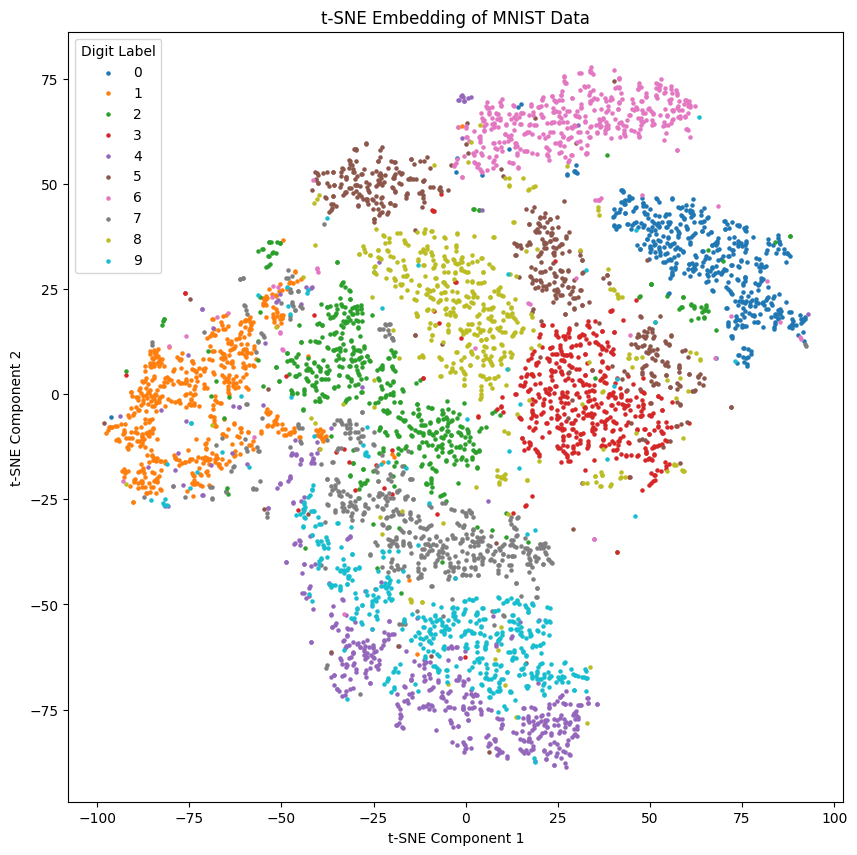

In [16]:
from sklearn.datasets import fetch_openml
from sklearn.manifold import TSNE

y = labelss
tsne = TSNE(n_components=2,n_iter=1000, random_state=42,perplexity=25,learning_rate=400)
X_tsne = tsne.fit_transform(digitss)

colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple',
          'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']

fig, ax = plt.subplots(figsize=(10, 10))
for i in range(10):
    ax.scatter(X_tsne[y == i, 0], X_tsne[y == i, 1], c=colors[i], label=str(i), s=5)
ax.legend(title='Digit Label')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Embedding of MNIST Data')
plt.show()